# Análise de dados do mercado financeiro com Python




## Importando as bibliotecas necessárias para as análises

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_datareader import data 
from scipy import stats

## Coletando os dados das ações da empresa B2W de forma online com a biblioteca DataReader.

Para manter o padrão, vou coletar os dados das ações da B2W no source do Yahoo Finanças. Para mais informações sobre a biblioteca e as fontes de dados disponíveis acesse a [documentação.](https://pydata.github.io/pandas-datareader)

In [3]:
df_b2w = data.DataReader(name = 'BTOW3.SA', data_source='yahoo', start='2015-01-01', end ='2020-12-30')

In [4]:
df_b2w

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,22.124950,19.827507,21.372005,21.140331,480673.0,21.140331
2015-01-05,21.140331,20.223286,21.140331,20.464613,2434653.0,20.464613
2015-01-06,21.207903,20.213633,20.319817,20.522532,2351157.0,20.522532
2015-01-07,20.686634,20.078487,20.638369,20.319817,378530.0,20.319817
2015-01-08,20.261898,19.306238,20.261898,19.653751,431881.0,19.653751
...,...,...,...,...,...,...
2020-12-22,78.059998,75.949997,77.550003,75.970001,2403700.0,75.970001
2020-12-23,77.099998,75.580002,76.300003,75.599998,2215200.0,75.599998
2020-12-28,77.500000,73.809998,76.089996,77.040001,3593500.0,77.040001


Perceba como é bem prático puxar os dados históricos de uma empresa com uma grande gama de dados. 
Uma observação é que apesar de colocarmos a data de ínicio no dia 01 de Janeiro de 2015, a informação veio com D+1 porque dia primeiro é feriado e não tem movimentação nas bolsas.

As colunas de High e Low são os maiores e menores valores que aquela ação alcançou.

Open e Close são os valores da ação na abertura e no fechamento do mercado

Volume é a quantidade de ações vendidas naquele período 

Adj Close é o valor de fechamento real ajustado a quaisquer particularidades daquela ação, como o pagamento de dividendos e desdobramentos, por exemplo.

In [5]:
df_b2w.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1488.000000,1488.000000,1488.000000,1488.000000,1.488000e+03,1488.000000
mean,34.659313,32.969301,33.829448,33.821489,1.995238e+06,33.821489
std,27.707443,26.431020,27.091571,27.053057,1.843455e+06,27.053057
min,8.822951,8.543010,8.678154,8.620235,0.000000e+00,8.620235
25%,14.675155,13.924624,14.344535,14.339708,5.886432e+05,14.339708
50%,23.815830,22.679154,23.237608,23.460002,1.576810e+06,23.460002
75%,45.024718,42.316016,43.700245,43.613760,2.833554e+06,43.613760
max,127.469025,121.250000,125.650002,126.000000,2.169749e+07,126.000000


Com essa análise exploratória inicial, conseguimos perceber alguns comportamentos de variação da ação. 

- A diferença entre o mínimo e o máximo valor são bem discrepantes.
- Com uma média de 33,82, comparado com suas variações, podemos perceber que existe uma grande flutuação em seu valor, o que podemos perceber pelo desvio padrão de 27,05.  

In [6]:
print ('MAX: ', df_b2w['Close'][df_b2w['Close'] >= df_b2w['Close'].max()]);
print ('----------------------------')
print ('MIN: ', df_b2w['Close'][df_b2w['Close'] <= df_b2w['Close'].min()])

MAX:  Date
2020-08-03    126.0
Name: Close, dtype: float64
----------------------------
MIN:  Date
2016-06-07    8.620235
Name: Close, dtype: float64


Podemos ver que os preços das ações da empresa atingiram seu ápice no meio de 2020, o que pode indicar um reflexo do e-commerce no meio do isolamento.

Vou salvar o arquivo em csv para ter os dados, caso minha fonte tenha algum problema.

In [7]:
df_b2w.to_csv('b2w.csv')

In [8]:
#Caso não queira baixar a base novamente, podemos partir daqui, descomentando esse código
#df_b2w = pd.read_csv('/content/b2w.csv')
#df_b2w'''

- # Data Visualization

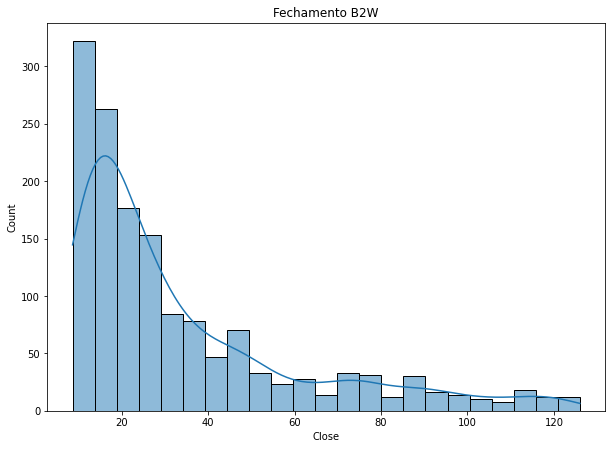

In [18]:
plt.figure(figsize=(10,50))
plt.subplot(6, 1, 2)
sns.histplot(df_b2w['Close'], kde = True)
plt.title('Fechamento B2W');

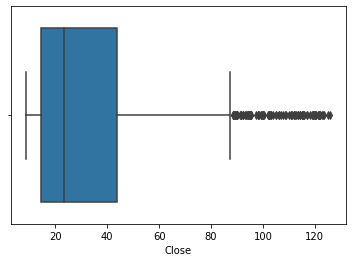

In [19]:
sns.boxplot(x = df_b2w['Close']);

In [12]:
print(df_b2w['Close'].describe(), df_b2w['Close'].mode())

count    1488.000000
mean       33.821489
std        27.053057
min         8.620235
25%        14.339708
50%        23.460002
75%        43.613760
max       126.000000
Name: Close, dtype: float64 0    12.355993
1    13.145903
dtype: float64


Conseguimos verificar que a maior concentração fica abaixo dos R$ 30,00. O que indica uma distribuição assimétrica positiva, onde a mediana e a média se encontram a direita da moda da distribuição.

Temos também uma quantidade muito grande de outliers para esse período de análise. Mais uma indicação que o preço das ações estão com uma variação atípica.

Para uma análise série temporal, preciso que a Data esteja como coluna e não como índice, pra isso podemos resetar o indice transformando o mesmo em coluna.

In [13]:
df_b2w.reset_index(level=0, inplace=True)
df_b2w

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,22.124950,19.827507,21.372005,21.140331,480673.0,21.140331
1,2015-01-05,21.140331,20.223286,21.140331,20.464613,2434653.0,20.464613
2,2015-01-06,21.207903,20.213633,20.319817,20.522532,2351157.0,20.522532
3,2015-01-07,20.686634,20.078487,20.638369,20.319817,378530.0,20.319817
4,2015-01-08,20.261898,19.306238,20.261898,19.653751,431881.0,19.653751
...,...,...,...,...,...,...,...
1483,2020-12-22,78.059998,75.949997,77.550003,75.970001,2403700.0,75.970001
1484,2020-12-23,77.099998,75.580002,76.300003,75.599998,2215200.0,75.599998
1485,2020-12-28,77.500000,73.809998,76.089996,77.040001,3593500.0,77.040001
1486,2020-12-29,78.040001,75.580002,77.480003,75.699997,3360100.0,75.699997


Agora podemos gerar nosso grafico de linha para ver como a ação performou em relação ao tempo

In [14]:
figura = px.line(title = 'Histórico do preço das ações')
figura.add_scatter(x = df_b2w['Date'], y = df_b2w['Close'])
figura.show()

Olha como o visual ajuda a analisarmos mais facilmente as variações dessa ação.
Ela vinha com uma taxa de crescimento contínua até o ínicio de 2019 onde teve uma queda.
Depois começou novamente a uma subida mais rapidamente e novamente no ínicio de 2020 uma grande queda.
Provavelmente em meados de março, onde tivemos toda a incerteza do isolamento, porém com as adaptações o preço das ações dispararam atigindo seu ápice em agosto de 2020 e hoje em opera em queda, numa indicação que volte aos patamares pré-pandemia de crescimento.

Vamos agora verificar as taxas de retorno dessa ação ao longo do tempo.


- # Taxas de Retorno (ROI)

- ## Taxa de Retorno Simples



A taxa de retorno simples é obtida atráves da fórmula: 

TRS = ((PF / PI ) - 1)

Sendo:

- TRS: Taxa de Retorno Simples.
- PI: Preço Inicial da ação no momento da compra.
- PF: Preço Final da ação no momento da venda.

Pra facilitar o entendimento, vamos com um exemplo prático.

Digamos que tenhamos comprado uma ação no primeiro dia útil de 2015 e queremos saber qual seria a taxa de retorno simples se vendessemos ela hoje.


In [15]:
PI = float(df_b2w['Close'].head(1))
PF = float(df_b2w['Close'].tail(1))

In [16]:
PI, PF

(21.140331268310547, 75.61000061035156)

Agora temos o preço inicial da ação e o preço final. Só aplicar na formula e saber nosso percentual de lucro ou prejuizo.

Multiplicando por 100% facilita a visualização da porcentagem.

In [17]:
((PF / PI) - 1) * 100

257.65759604576914

Teriamos uma taxa de retorno simples de 234% positiva. Agora iremos calcular as taxas de retorno diárias e anuais. 

- ## Taxa de Retorno Diária




Para a taxa de retorno diária, podemos aplicar a formula de TRS para nosso dataset inteiro com uma nova coluna shiftando por 1 dia na frente.
Isso quer dizer, que ele vai pegar o preço de fechamento do dia anterior e o do fechamento do dia para fazer os cálculos.

Como podem observar, o primeiro dia vai ficar zerado, pois não existia nenhum registro anterior a ele. 

In [28]:
df_b2w['TRS Daily'] = ((df_b2w['Close'] / df_b2w['Close'].shift(1)) - 1).fillna(0)

In [29]:
df_b2w

,Date,High,Low,Open,Close,Volume,Adj Close,TRS Daily
0,2015-01-02,22.124950,19.827507,21.372005,21.140331,480673.0,21.140331,0.000000
1,2015-01-05,21.140331,20.223286,21.140331,20.464613,2434653.0,20.464613,-0.031963
2,2015-01-06,21.207903,20.213633,20.319817,20.522532,2351157.0,20.522532,0.002830
3,2015-01-07,20.686634,20.078487,20.638369,20.319817,378530.0,20.319817,-0.009878
4,2015-01-08,20.261898,19.306238,20.261898,19.653751,431881.0,19.653751,-0.032779
...,...,...,...,...,...,...,...,...
1483,2020-12-22,78.059998,75.949997,77.550003,75.970001,2403700.0,75.970001,-0.014656
1484,2020-12-23,77.099998,75.580002,76.300003,75.599998,2215200.0,75.599998,-0.004870
1485,2020-12-28,77.500000,73.809998,76.089996,77.040001,3593500.0,77.040001,0.019048
1486,2020-12-29,78.040001,75.580002,77.480003,75.699997,3360100.0,75.699997,-0.017394


Notem que agora temos a nossa taxa de retorno diária, sempre contabilizando o valor de fechamento do dia anterior. Para tirar a prova é só aplicar a fórmula em qualquer valor e verificar. Vou calcular o retorno do dia 08-01-2015.

- Fechamento do dia 07 = 20.319799
- Fechamento do dia 08 = 19.653799 
- Taxa de Retorno = ((19.653799 / 20.319799) - 1) = -0.032776

Podemos plotar um gráfico de linhas, pra facilitar ainda mais o entendimento.

In [20]:
figura = px.line(title = 'Taxa de retorno diário das ações')
figura.add_scatter(x = df_b2w['Date'], y = df_b2w['TRS Daily'])
figura.show()

- ## Taxa de Retorno Anual

A taxa de retorno anual pode ser calculada pela média do retorno diário multiplicada pelo número de dias úteis do ano. 
Podemos aplicar essa fórmula para todos os anos e veroficar a taxa de retorno anual

In [22]:
TRS = pd.DataFrame()
for i in df_b2w['Date'].dt.year.unique(): 
  x =  {i: (df_b2w.query('Date.dt.year in ['+str(i)+']')['TRS Daily'].mean() * len(df_b2w.query('Date.dt.year in ['+str(i)+']'))) * 100}
  df = pd.DataFrame([x], columns=x.keys())
  TRS = pd.concat([TRS, df], axis = 1)

TRS

,2015,2016,2017,2018,2019,2020
0,-18.972303,-22.119363,85.730894,86.583274,53.707383,48.70979


Vemos que nos dois primeiros anos a taxa de retorno das ações estava negativa, nos dois anos seguintes deram um enorme crescimento, tendendo a se estabilizarem nos dois anos últimos anos. 

- # Previsão de Preços das Ações

- ## Simulação Monte Carlo

Nessa abordagem, utilizamos dados históricos para criar simulações de vários cenários futuros baseados na média, variância e desvio padrão.
Com isso é possível entender o impacto do risco e da incerteza pra ajudar na tomada de decisão. Simulação pelo movimento browniano.

Para isso precisamos isolar o preço da ação num dataframe para realizar as previsões.


In [30]:
df_mc = pd.DataFrame(df_b2w['Close'])
df_mc.columns= ['BTOW3']
df_mc

,BTOW3
0,21.140331
1,20.464613
2,20.522532
3,20.319817
4,19.653751
...,...
1483,75.970001
1484,75.599998
1485,77.040001
1486,75.699997


Precisamos normalizar os dados e calcular as taxas de retorno diária  logaritmicas 

In [31]:
df_mc_norm = df_mc.copy()
for i in df_mc:
  df_mc_norm[i] = df_mc[i] / df_mc[i][0]
df_mc_norm

,BTOW3
0,1.000000
1,0.968037
2,0.970776
3,0.961187
4,0.929680
...,...
1483,3.593605
1484,3.576103
1485,3.644219
1486,3.580833


In [32]:
df_mc_trl = np.log(1 + df_mc_norm.pct_change()).fillna(0)
df_mc_trl

,BTOW3
0,0.000000
1,-0.032485
2,0.002826
3,-0.009927
4,-0.033328
...,...
1483,-0.014765
1484,-0.004882
1485,0.018869
1486,-0.017547


- ## Cálculo do drift

Drift é a direção que as taxas de retorno tiveram no passado. 
É possível calcular através da fórmula:

Drift = µ - ((1/2) * σ²)

Onde:
- µ é a média dos retornos
- σ² é a variancia dos retornos

In [33]:
media = df_mc_trl.mean()
media

BTOW3    0.000856
dtype: float64

In [34]:
variancia = df_mc_trl.var()
variancia

BTOW3    0.001421
dtype: float64

In [35]:
drift = media - (0.5 * variancia)
drift

BTOW3    0.000146
dtype: float64

- ## Cálculo dos retornos diários

Baseado no drift, vamos calular agora os retornos diários para 50 dias a frente com 10 simulações.

In [36]:
dias_frente = 50
simulacoes = 10

In [37]:
desvio_padrao = df_mc_trl.std()
desvio_padrao

BTOW3    0.0377
dtype: float64

Indica o qunato as taxas de retorno estão afastadas da média.

Agora precisamos gerar os números aleatórios que sigam a distribuição normal, usando a função ppf.

In [38]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))
Z.shape

(50, 10)

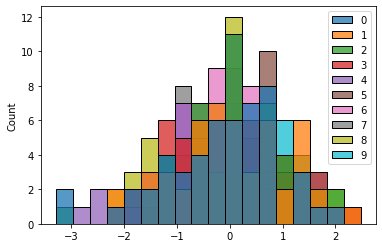

In [39]:
sns.histplot(Z);

Nossa distribuição está normalizada, podemos aplicar as variaveis a formula de pra calcular o retorno diário que seria:

exponenciação de r que é igual drift + desvio_padrao * matriz Z

In [40]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

In [41]:
retornos_diarios.shape

(50, 10)

Agora que temos nossas taxas de retornos reais, e as taxas futuras, agora podemos partir para a previsão dos valores futuros
.

- ## Previsões de preços futuros

Começamos criando uma variável zerado com o mesmo formato dos retornos diários

In [42]:
previsoes = np.zeros_like(retornos_diarios)

In [43]:
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

A ideia agora é colocar essa variável o nosso último valor real conhecido da nossa base de dados que será o marco zero da nossa simulação


In [44]:
previsoes[0] = df_mc.iloc[-1]
previsoes[0]

array([75.61000061, 75.61000061, 75.61000061, 75.61000061, 75.61000061,
       75.61000061, 75.61000061, 75.61000061, 75.61000061, 75.61000061])

Agora basta percorrer os registros com a quantidade dos dias pra frente e prever os valores

In [45]:
for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

Agora que já temos as previsões, podemos gerar o gráfico delas para melhor visualização.

- ## Gráfico das previsões

In [46]:
figura = px.line(title = 'Previsões do preço das simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)
figura.show()

Podemos clicar no botão "Compare data on hover" para verificar os valores e podemos concluir que:

Começamos a nossa previsão com um valor de 75.61, com melhor cenário sendo o 5 (99,53) e o pior sendo o 4 (37.57)

Agora podemos validar nossa simulação, comparando os valores reais com os previstos.

- ## Comparação das previsões com os preços reais


Vamos importar agora os valores novos para comparação. 

Obs: Como esse notebook é working process, podem não ter ainda as 50 datas a frente.

In [54]:
from pandas_datareader import data
df_b2w_atual = data.DataReader(name = 'BTOW3.SA', data_source='yahoo', start='2021-01-01')['Close']
df_b2w_atual

Date
2021-01-04    75.180000
2021-01-05    73.500000
2021-01-06    68.699997
2021-01-07    67.309998
2021-01-08    71.900002
2021-01-11    71.309998
2021-01-12    74.089996
2021-01-13    75.300003
2021-01-14    77.349998
Name: Close, dtype: float64

In [55]:
#Vamos salvar o dataset para caso ocorra algum erro com o servidor e não perdermos os dados, e ler o arquivo de novo para entrar no formato de dataframe.
df_b2w_atual.to_csv('b2w_atual.csv')
df_b2w_atual = pd.read_csv('b2w_atual.csv')
df_b2w_atual

,Date,Close
0,2021-01-04,75.180000
1,2021-01-05,73.500000
2,2021-01-06,68.699997
3,2021-01-07,67.309998
4,2021-01-08,71.900002
5,2021-01-11,71.309998
6,2021-01-12,74.089996
7,2021-01-13,75.300003
8,2021-01-14,77.349998


Temos agora que fazer as comparações com as simulações executadas. No nosso caso, fizemos 10 simulações. 
Para termos uma idéia do que iremos verificar pela frente, vamos realizar somente com a primeira simulação, por ora.

Para isso precisamos pegar as previsões, transpor no indíce zero (primeira simulação) e retornar somente o tamanho da nossa dataset atual). Isso é útil, pois podemos prever vários dias na frente, e comparar com somente uma parte.

In [59]:
sim1 = previsoes.T[0][0:len(df_b2w_atual)]
sim1

array([75.61000061, 75.32637279, 70.38799285, 69.50879023, 70.6810151 ,
       70.75912747, 66.74189459, 65.17165845, 69.32341437])

Temos nosso retorno dos nossos primeiros registros baseados no tamanho atual da amostra.

Podemos agora calcular na mão o erro de previsão, diminuindo o valor real pelo previsto, e depois também calcular o somatório dos valores das diferenças.

In [61]:
# Diferença absoluta dos valores reais e previstos
abs(df_b2w_atual['Close'] - sim1)

0     0.430000
1     1.826373
2     1.687996
3     2.198793
4     1.218986
5     0.550870
6     7.348102
7    10.128345
8     8.026584
Name: Close, dtype: float64

In [64]:
# Soma total dos valores absolutos das diferenças
np.sum(abs(sim1 - df_b2w_atual['Close'])) 

33.41604865449061

In [67]:
# Extraindo a média, podemos obter nosso erro médio absoluto (MAE)
np.sum(abs(sim1 - df_b2w_atual['Close'])) / len(sim1)

3.712894294943401

Podemos fazer isso de forma mais facil chamando as bibliotecas do sklearn

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_b2w_atual['Close'], sim1)

3.712894294943401

Agora vamos fazer os comparativos com todas as simulações.

In [69]:
erros = []
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(df_b2w_atual)]
  erros.append(mean_absolute_error(df_b2w_atual['Close'], simulacao))

In [70]:
erros

[3.712894294943401,
 8.907723588442368,
 6.5334445822272205,
 14.923078534936243,
 6.121286460390234,
 8.394628511878235,
 3.5118072357280425,
 2.3228777463153736,
 3.1402311339377493,
 6.642354794331201]

In [79]:
erro_max = erros.index(max(erros))
erro_min = erros.index(min(erros))

Com isso, conseguimos visualizar qual simulação tem o pior ou melhor MAE.
Vamos gerar um gráfico para vermos a pior e a melhor simulação.

In [81]:
figura = px.line(title = 'Previsões do preço das ações - Simulação')
figura.add_scatter(y = df_b2w_atual['Close'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[erro_max], name = 'Pior simulação')
figura.add_scatter(y = previsoes.T[erro_min], name = 'Melhor simulação')

Podemos ver então a comapração entre a melhor e a pior simulação e os valores reais dessa ação

- # Conclusão

Conseguimos usar a simulação de Monte Carlo para realizar algumas previsões para o valor do preço das ações de uma empresa. Com isso podemos, nos antecipar a alguns possíveis cenários e adequar nossas estratégias com alguma noção de futuro e não simplesmente no achismo.